In [1]:
# import some packages
import random
import os
import xarray as xr
import numpy as np
import xgcm # this is an xarray-based package to deal with GCM output
from matplotlib import pyplot as plt
import cmocean # this is a colormap package
import cartopy.crs as ccrs # this is a mapping package
import gsw
from scipy.ndimage import convolve
from scipy.ndimage import gaussian_filter as gf
%matplotlib inline
import matplotlib as mpl 
import seaborn as sns
sns.set(style='ticks', context='notebook',font_scale=1.3)
mpl.rc('figure', dpi=100)
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)

plt.rcParams['font.size'] = 16

In [2]:
ds = xr.open_dataset('taiwan_snapshot_30timesteps.nc')

In [3]:
ds_1 = ds.isel(time=1)

In [4]:
ds_5 = ds.isel(time = 5)

In [5]:
ds_10 = ds.isel(time = 10)

In [6]:
ds_15 = ds.isel(time = 15)
ds_20 = ds.isel(time = 20)
ds_25 = ds.isel(time = 25)
ds_30 = ds.isel(time = 30)

In [7]:
grid = xgcm.Grid(ds, periodic=False)
grid

<xgcm.Grid>
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
T Axis (not periodic, boundary=None):
  * center   time

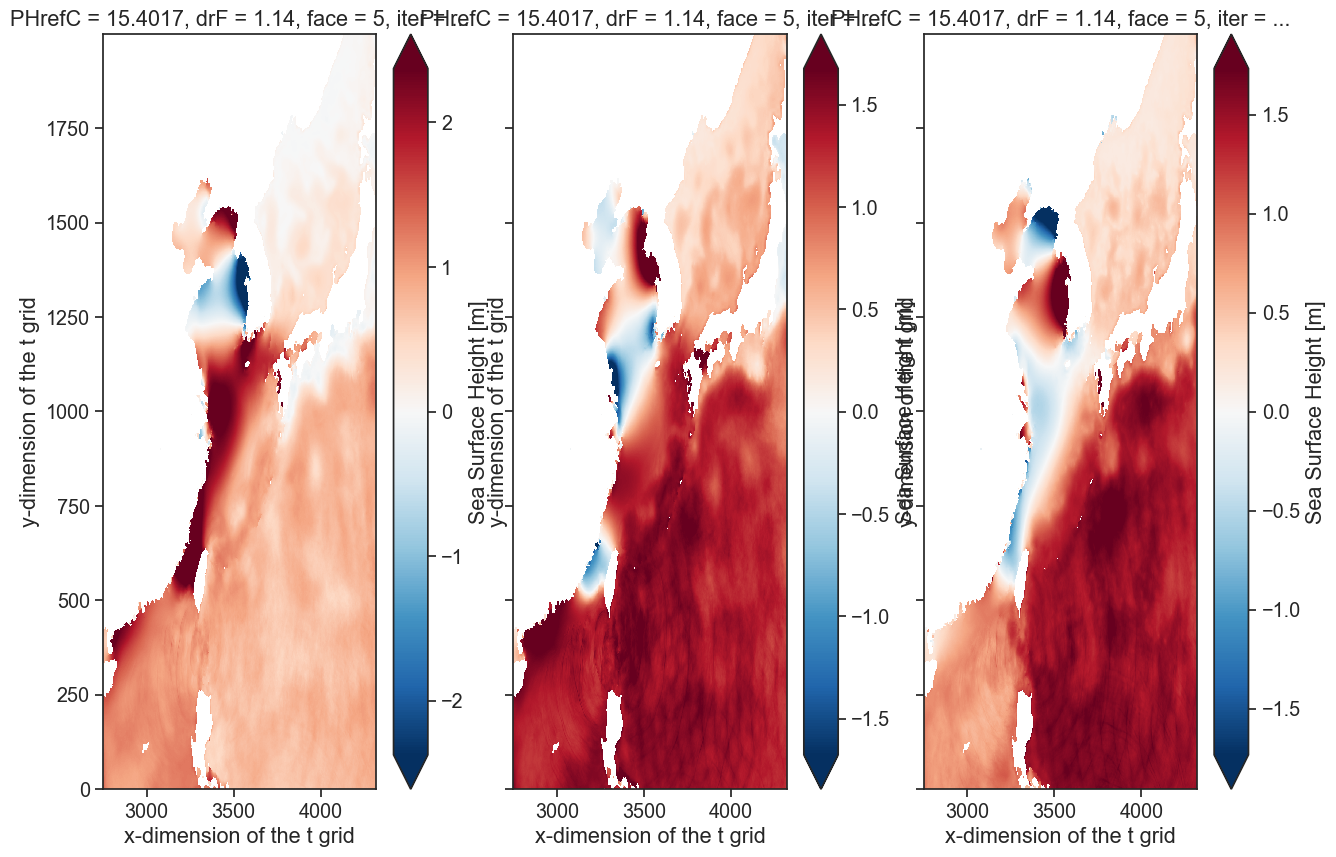

In [8]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
ds_1.SSH.plot(robust = True, ax = ax[0])
ds_5.SSH.plot(robust = True, ax = ax[1])
ds_10.SSH.plot(robust = True, ax = ax[2])

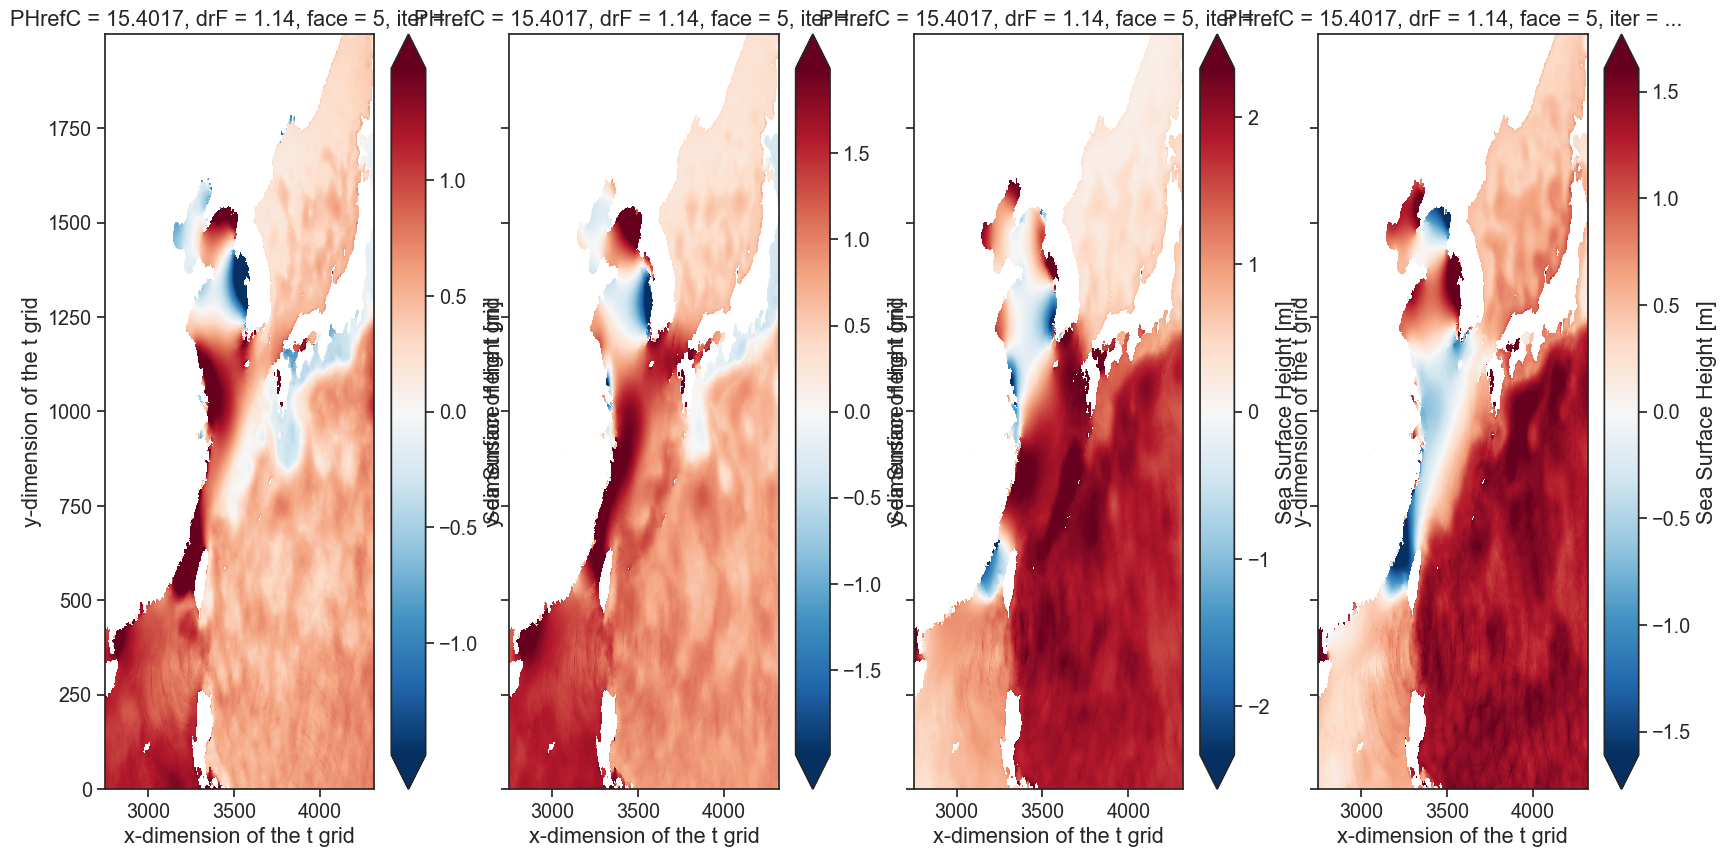

In [9]:
fig, ax = plt.subplots(1,4, figsize = (20,10), sharey = True)
ds_15.SSH.plot(robust = True, ax = ax[0])
ds_20.SSH.plot(robust = True, ax = ax[1])
ds_25.SSH.plot(robust = True, ax = ax[2])
ds_30.SSH.plot(robust = True, ax = ax[3])

In [10]:
def apply_gf(ds_array, sigma):
 '''Wrap gaussian_filter and apply along the fist dim (time) '''
 def g_f(ds_array, sigma): 
     return gf(ds_array,sigma=sigma, mode='reflect')
 return xr.apply_ufunc(g_f,ds_array,sigma)

sigma=10
ds_1['zeta_filt'] = apply_gf(ds_1.zeta,sigma)

In [11]:
ds_1['eta_filt'] = apply_gf(ds_1.SSH, sigma)
ds_5['eta_filt'] = apply_gf(ds_5.SSH, sigma)
ds_10['eta_filt'] = apply_gf(ds_10.SSH, sigma)

In [12]:
ds_15['eta_filt'] = apply_gf(ds_15.SSH, sigma)
ds_20['eta_filt'] = apply_gf(ds_20.SSH, sigma)
ds_25['eta_filt'] = apply_gf(ds_25.SSH, sigma)
ds_30['eta_filt'] = apply_gf(ds_30.SSH, sigma)

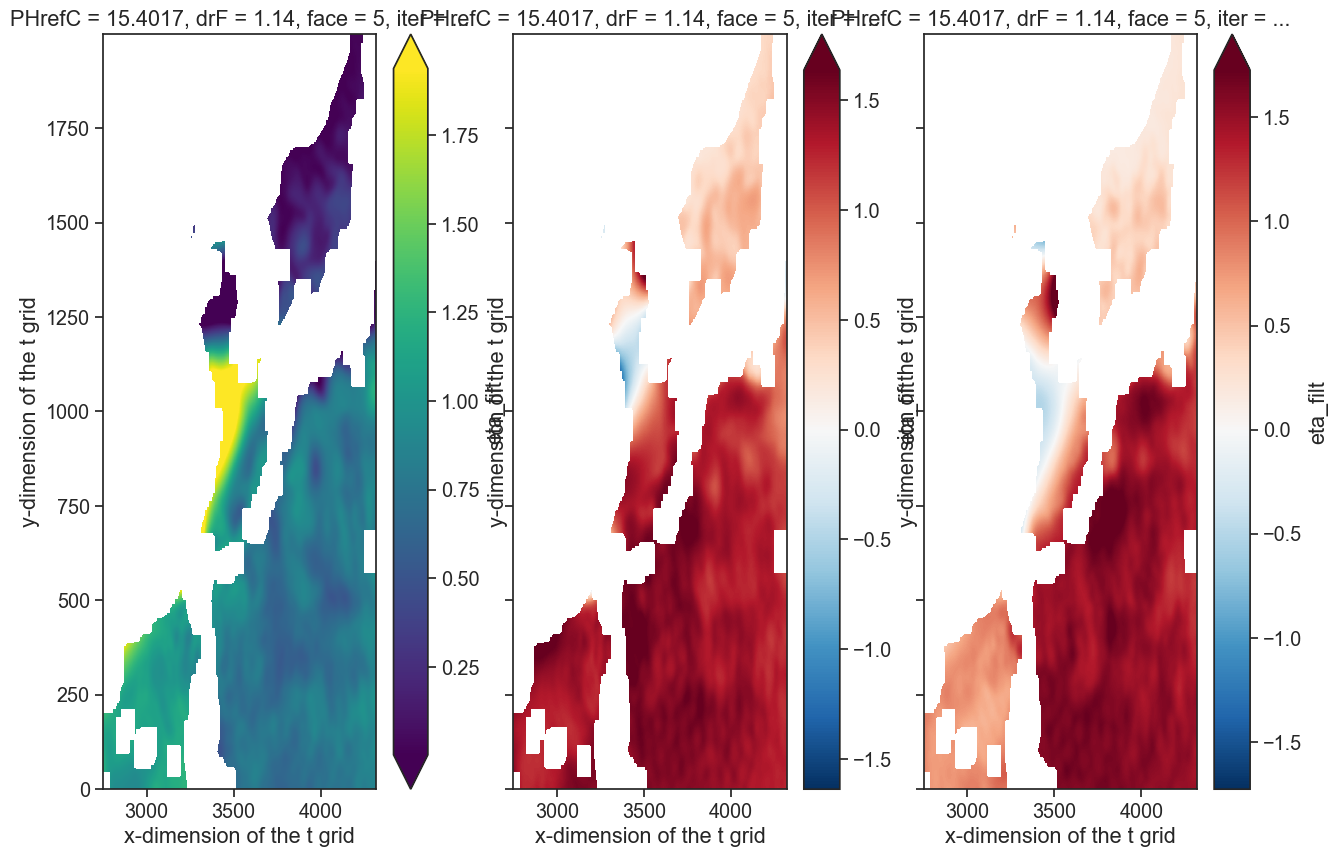

In [13]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
ds_1.eta_filt.plot(robust = True, ax = ax[0])
ds_5.eta_filt.plot(robust = True, ax = ax[1])
ds_10.eta_filt.plot(robust = True, ax = ax[2])

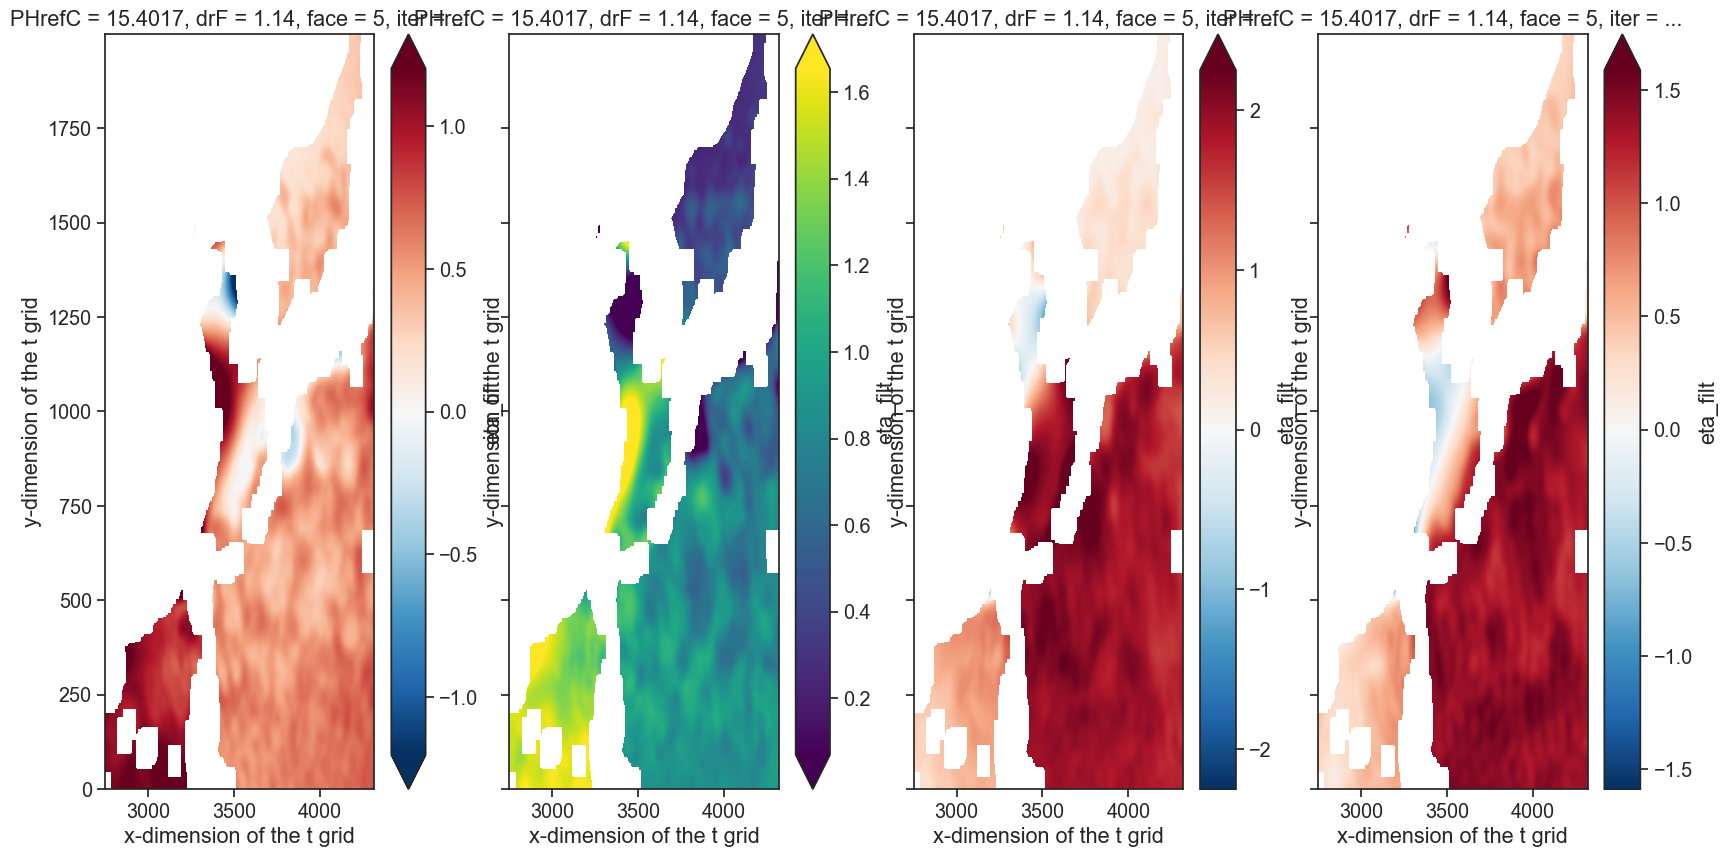

In [14]:
fig, ax = plt.subplots(1,4, figsize = (20,10), sharey = True)
ds_15.eta_filt.plot(robust = True, ax = ax[0])
ds_20.eta_filt.plot(robust = True, ax = ax[1])
ds_25.eta_filt.plot(robust = True, ax = ax[2])
ds_30.eta_filt.plot(robust = True, ax = ax[3])

In [15]:
metrics = {
 ('X',): ['dxC', 'dxG'], # X distances
 ('Y',): ['dyC', 'dyG'], # Y distances
# ('Z',): ['drW', 'drS', 'drC'], # Z distances
 ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}

grid = xgcm.Grid(ds, periodic=False, metrics=metrics)

ds_1['eta_dx'] = grid.derivative(ds_1.eta_filt, 'X', boundary='extend')
ds_1['eta_dy'] = grid.derivative(ds_1.eta_filt, 'Y', boundary='extend')

In [16]:
grid = xgcm.Grid(ds, periodic=False, metrics=metrics)

ds_5['eta_dx'] = grid.derivative(ds_5.eta_filt, 'X', boundary='extend')
ds_5['eta_dy'] = grid.derivative(ds_5.eta_filt, 'Y', boundary='extend')

In [17]:
grid = xgcm.Grid(ds, periodic=False, metrics=metrics)

ds_10['eta_dx'] = grid.derivative(ds_10.eta_filt, 'X', boundary='extend')
ds_10['eta_dy'] = grid.derivative(ds_10.eta_filt, 'Y', boundary='extend')

In [18]:
grid = xgcm.Grid(ds, periodic=False, metrics=metrics)

ds_15['eta_dx'] = grid.derivative(ds_15.eta_filt, 'X', boundary='extend')
ds_15['eta_dy'] = grid.derivative(ds_15.eta_filt, 'Y', boundary='extend')

ds_20['eta_dx'] = grid.derivative(ds_20.eta_filt, 'X', boundary='extend')
ds_20['eta_dy'] = grid.derivative(ds_20.eta_filt, 'Y', boundary='extend')

ds_25['eta_dx'] = grid.derivative(ds_25.eta_filt, 'X', boundary='extend')
ds_25['eta_dy'] = grid.derivative(ds_25.eta_filt, 'Y', boundary='extend')

ds_30['eta_dx'] = grid.derivative(ds_30.eta_filt, 'X', boundary='extend')
ds_30['eta_dy'] = grid.derivative(ds_30.eta_filt, 'Y', boundary='extend')

In [19]:
ds_1['f'] = gsw.f(ds_1.YC.mean(dim = 'i'))
ds_5['f'] = gsw.f(ds_5.YC.mean(dim = 'i'))
ds_10['f'] = gsw.f(ds_10.YC.mean(dim = 'i'))

In [20]:
ds_15['f'] = gsw.f(ds_15.YC.mean(dim = 'i'))
ds_20['f'] = gsw.f(ds_20.YC.mean(dim = 'i'))
ds_25['f'] = gsw.f(ds_25.YC.mean(dim = 'i'))
ds_30['f'] = gsw.f(ds_30.YC.mean(dim = 'i'))

In [21]:
ds_1['geo_V'] = 9.8 * ds_1.eta_dx/ds_1.f.mean()
ds_1['geo_U'] = -9.8 * ds_1.eta_dy/ds_1.f.mean()

In [22]:
ds_5['geo_V'] = 9.8 * ds_5.eta_dx/ds_5.f.mean()
ds_5['geo_U'] = -9.8 * ds_5.eta_dy/ds_5.f.mean()

In [23]:
ds_10['geo_V'] = 9.8 * ds_10.eta_dx/ds_10.f.mean()
ds_10['geo_U'] = -9.8 * ds_10.eta_dy/ds_10.f.mean()

In [24]:
ds_15['geo_V'] = 9.8 * ds_15.eta_dx/ds_15.f.mean()
ds_15['geo_U'] = -9.8 * ds_15.eta_dy/ds_15.f.mean()

ds_20['geo_V'] = 9.8 * ds_20.eta_dx/ds_20.f.mean()
ds_20['geo_U'] = -9.8 * ds_20.eta_dy/ds_20.f.mean()

ds_25['geo_V'] = 9.8 * ds_25.eta_dx/ds_25.f.mean()
ds_25['geo_U'] = -9.8 * ds_25.eta_dy/ds_25.f.mean()

ds_30['geo_V'] = 9.8 * ds_30.eta_dx/ds_30.f.mean()
ds_30['geo_U'] = -9.8 * ds_30.eta_dy/ds_30.f.mean()

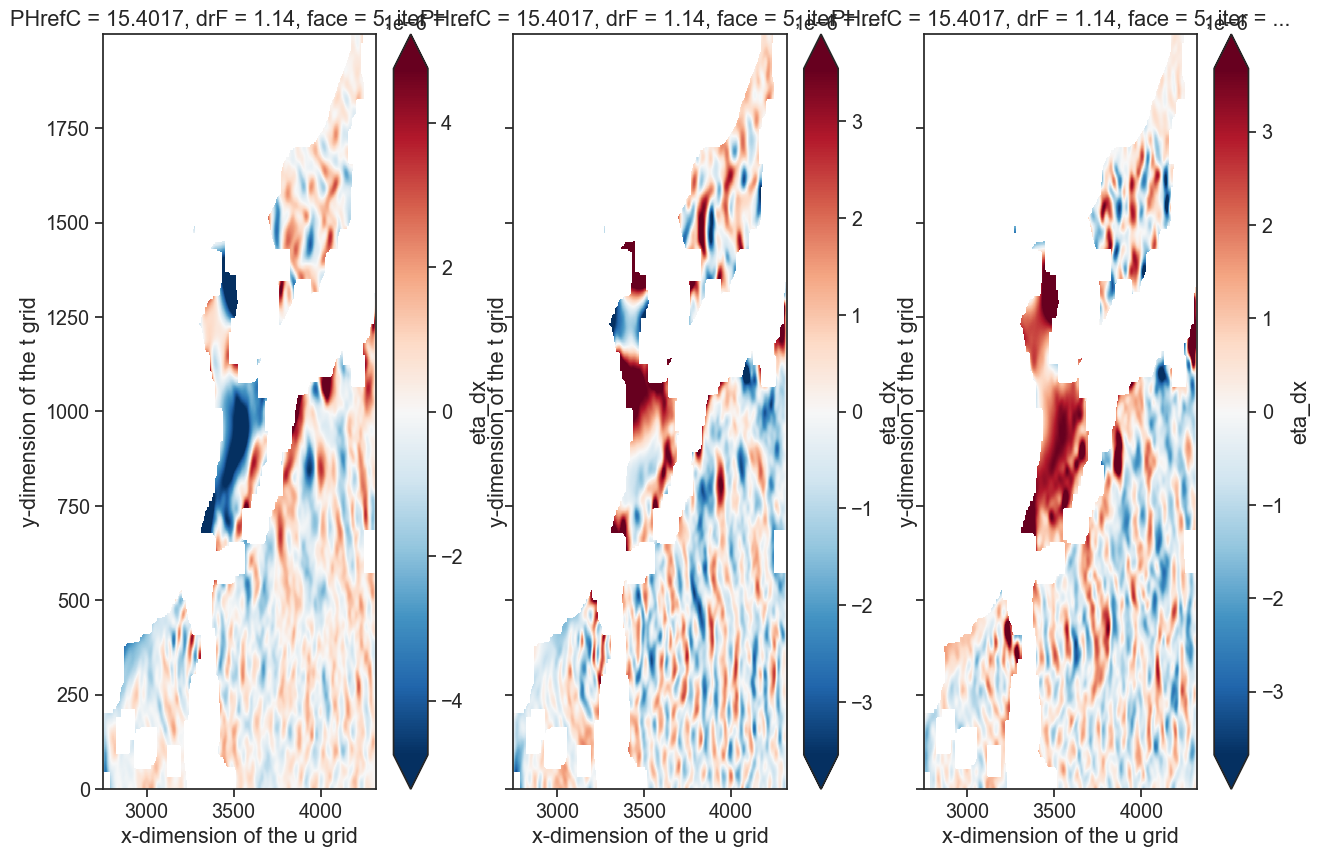

In [25]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
ds_1.eta_dx.plot(robust = True, ax = ax[0])
ds_5.eta_dx.plot(robust = True, ax = ax[1])
ds_10.eta_dx.plot(robust = True, ax = ax[2])

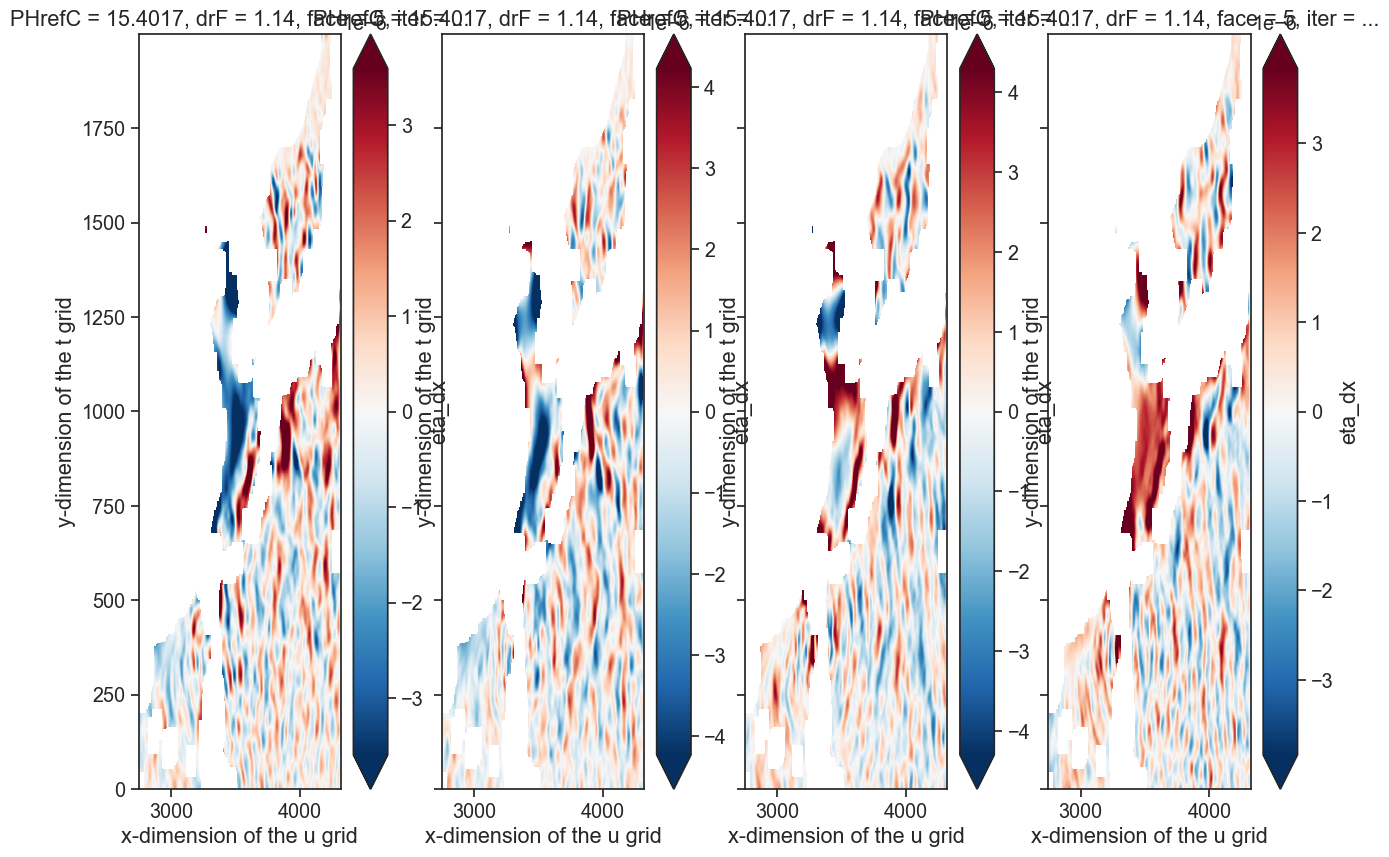

In [26]:
fig, ax = plt.subplots(1,4, figsize = (15,10), sharey = True)
ds_15.eta_dx.plot(robust = True, ax = ax[0])
ds_20.eta_dx.plot(robust = True, ax = ax[1])
ds_25.eta_dx.plot(robust = True, ax = ax[2])
ds_30.eta_dx.plot(robust = True, ax = ax[3])

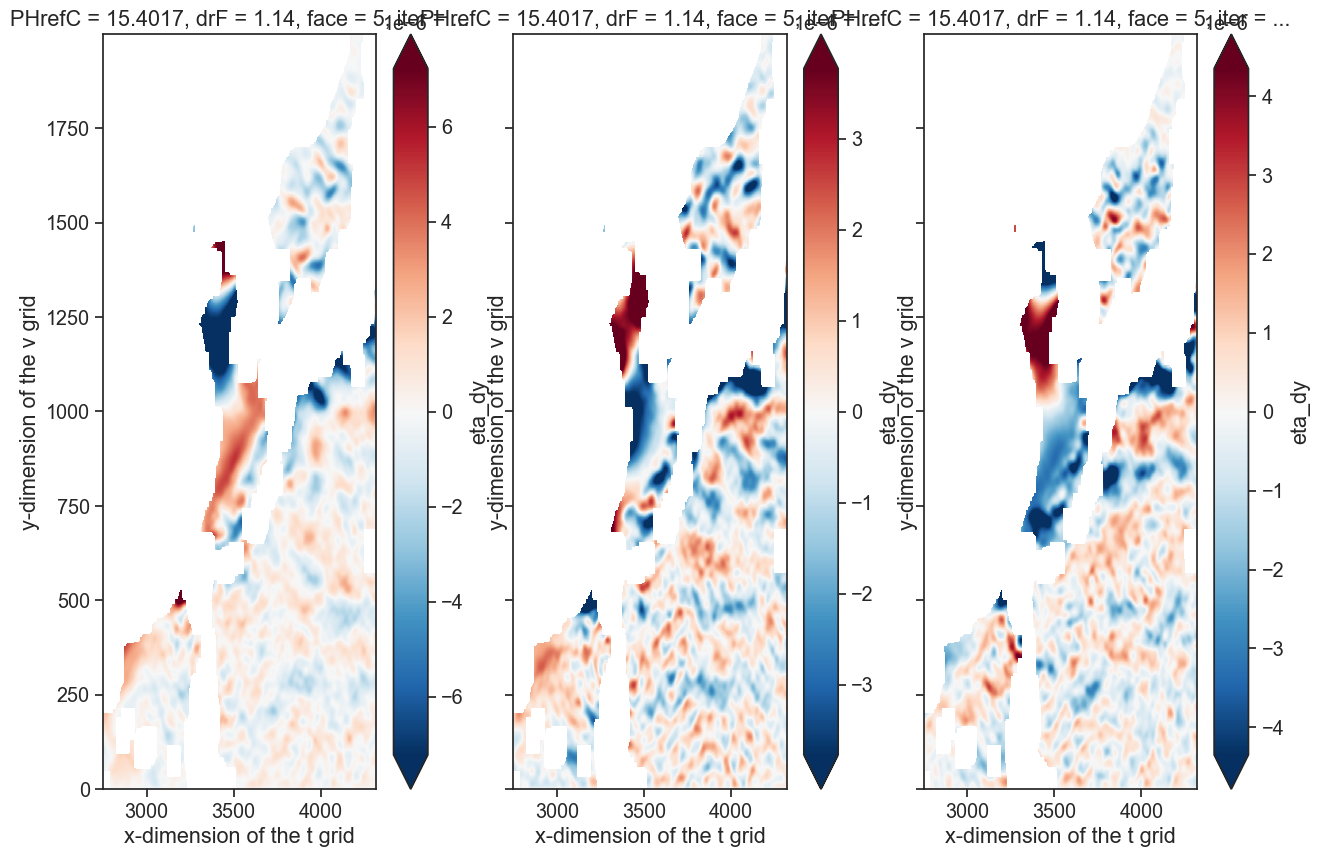

In [27]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
ds_1.eta_dy.plot(robust = True, ax = ax[0])
ds_5.eta_dy.plot(robust = True, ax = ax[1])
ds_10.eta_dy.plot(robust = True, ax = ax[2])

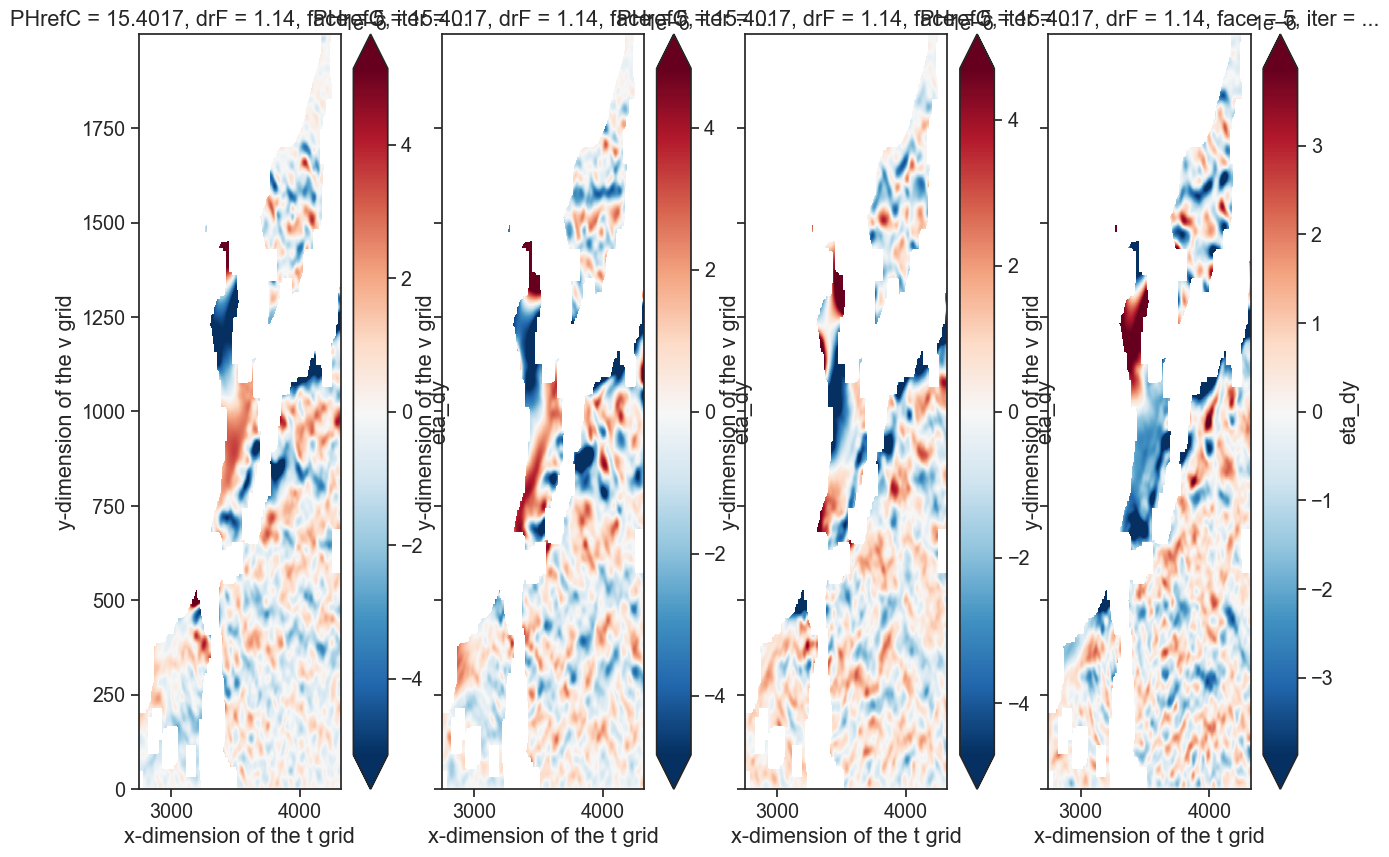

In [28]:
fig, ax = plt.subplots(1,4, figsize = (15,10), sharey = True)
ds_15.eta_dy.plot(robust = True, ax = ax[0])
ds_20.eta_dy.plot(robust = True, ax = ax[1])
ds_25.eta_dy.plot(robust = True, ax = ax[2])
ds_30.eta_dy.plot(robust = True, ax = ax[3])

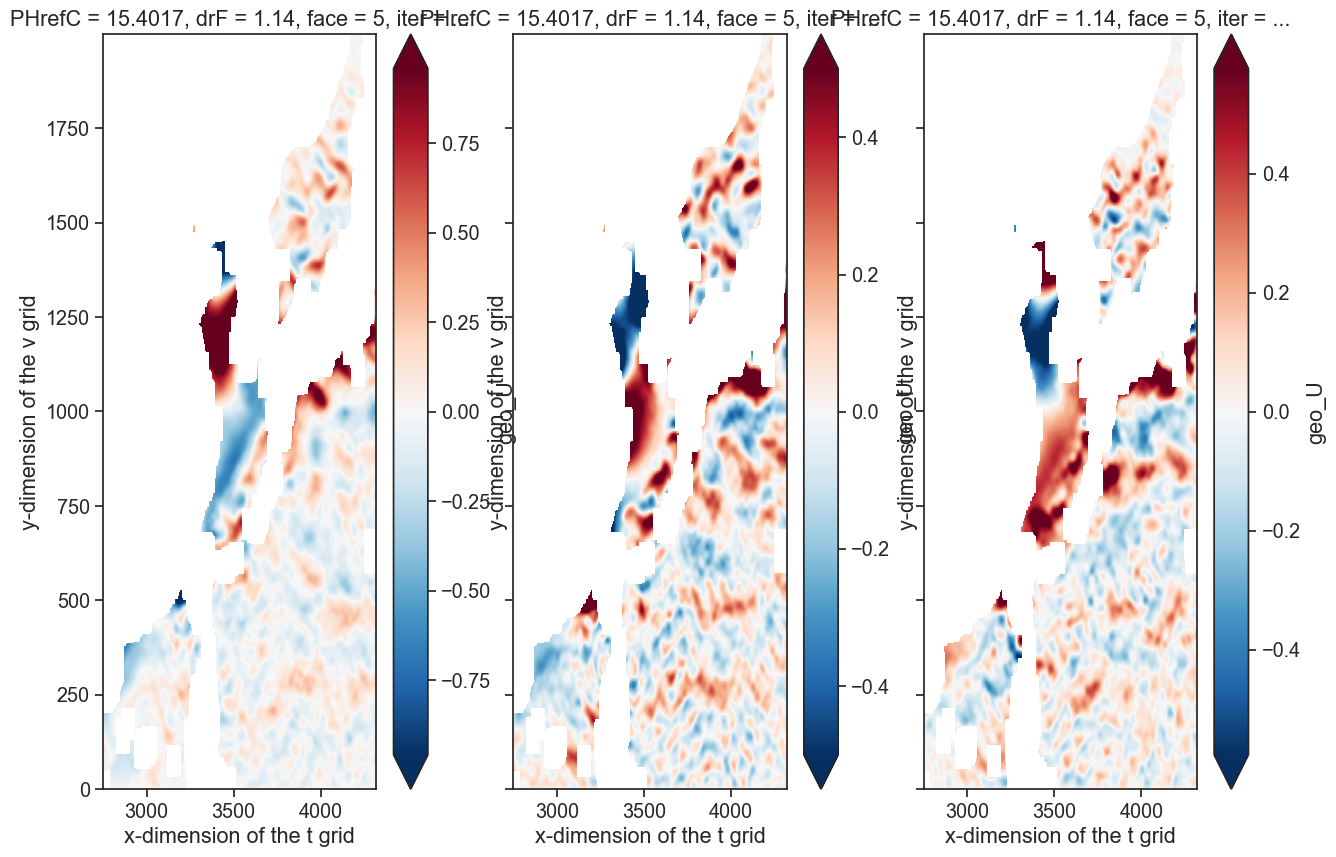

In [29]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
ds_1.geo_U.plot(robust = True, ax = ax[0])
ds_5.geo_U.plot(robust = True, ax = ax[1])
ds_10.geo_U.plot(robust = True, ax = ax[2])

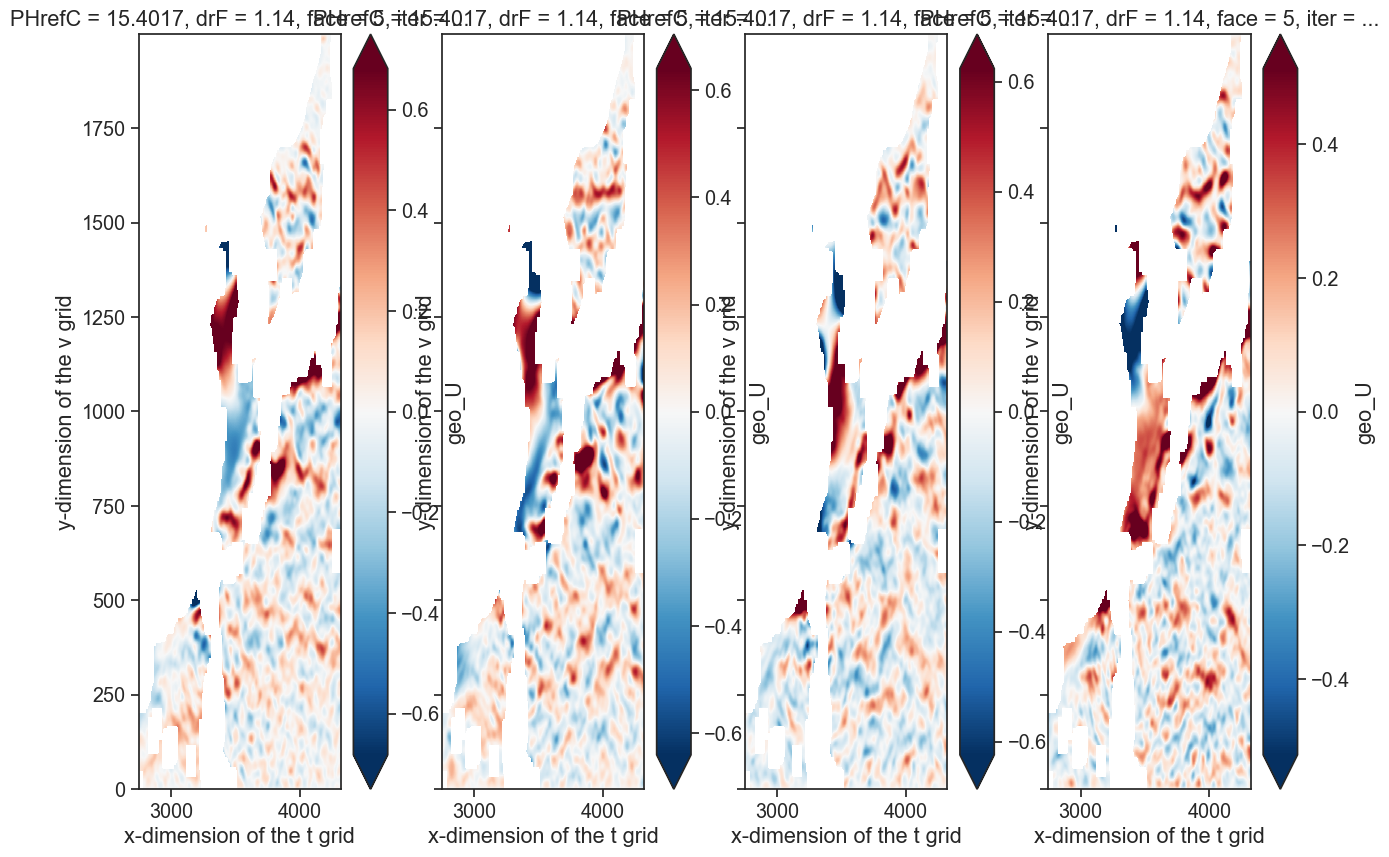

In [30]:
fig, ax = plt.subplots(1,4, figsize = (15,10), sharey = True)
ds_15.geo_U.plot(robust = True, ax = ax[0])
ds_20.geo_U.plot(robust = True, ax = ax[1])
ds_25.geo_U.plot(robust = True, ax = ax[2])
ds_30.geo_U.plot(robust = True, ax = ax[3])

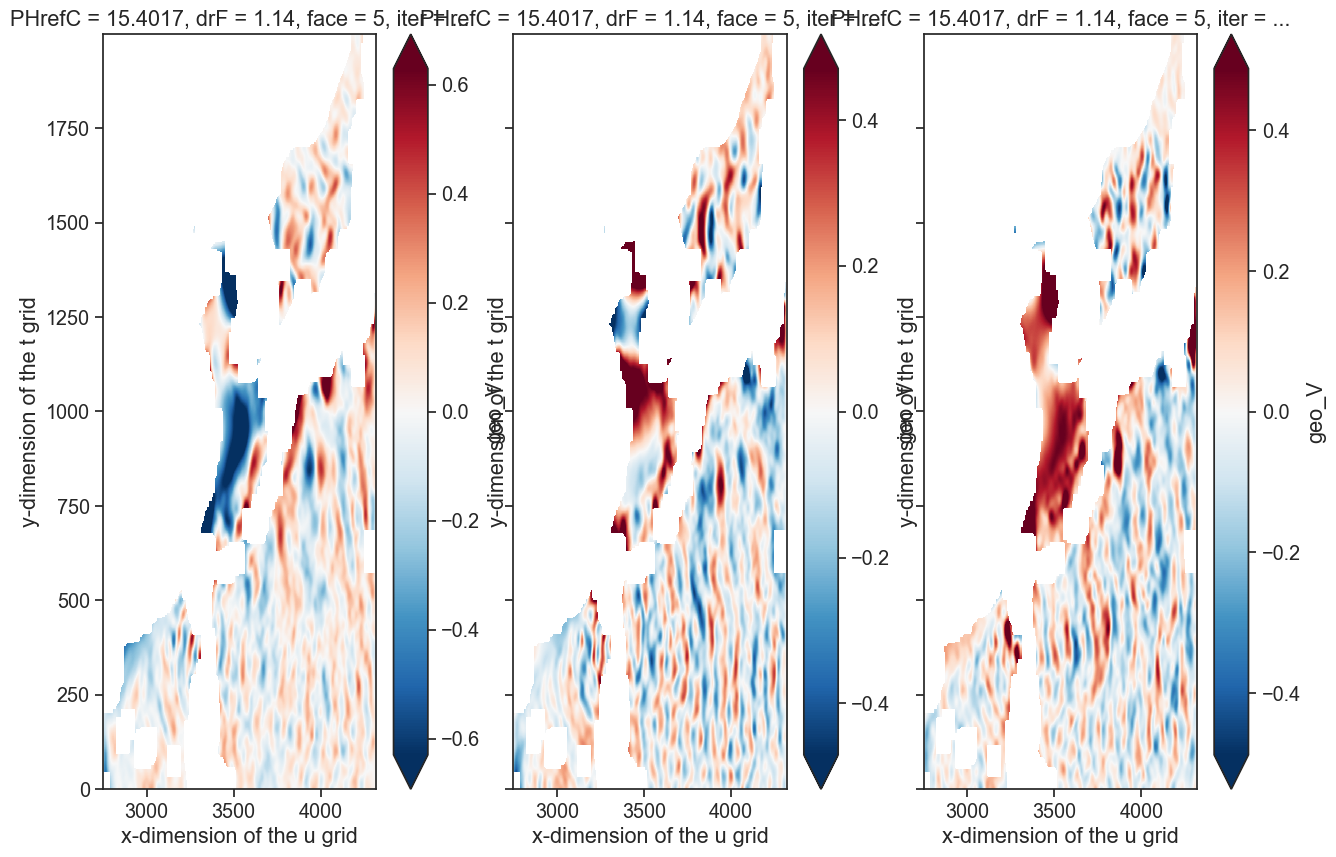

In [31]:
fig, ax = plt.subplots(1,3, figsize = (15,10), sharey = True)
ds_1.geo_V.plot(robust = True, ax = ax[0])
ds_5.geo_V.plot(robust = True, ax = ax[1])
ds_10.geo_V.plot(robust = True, ax = ax[2])

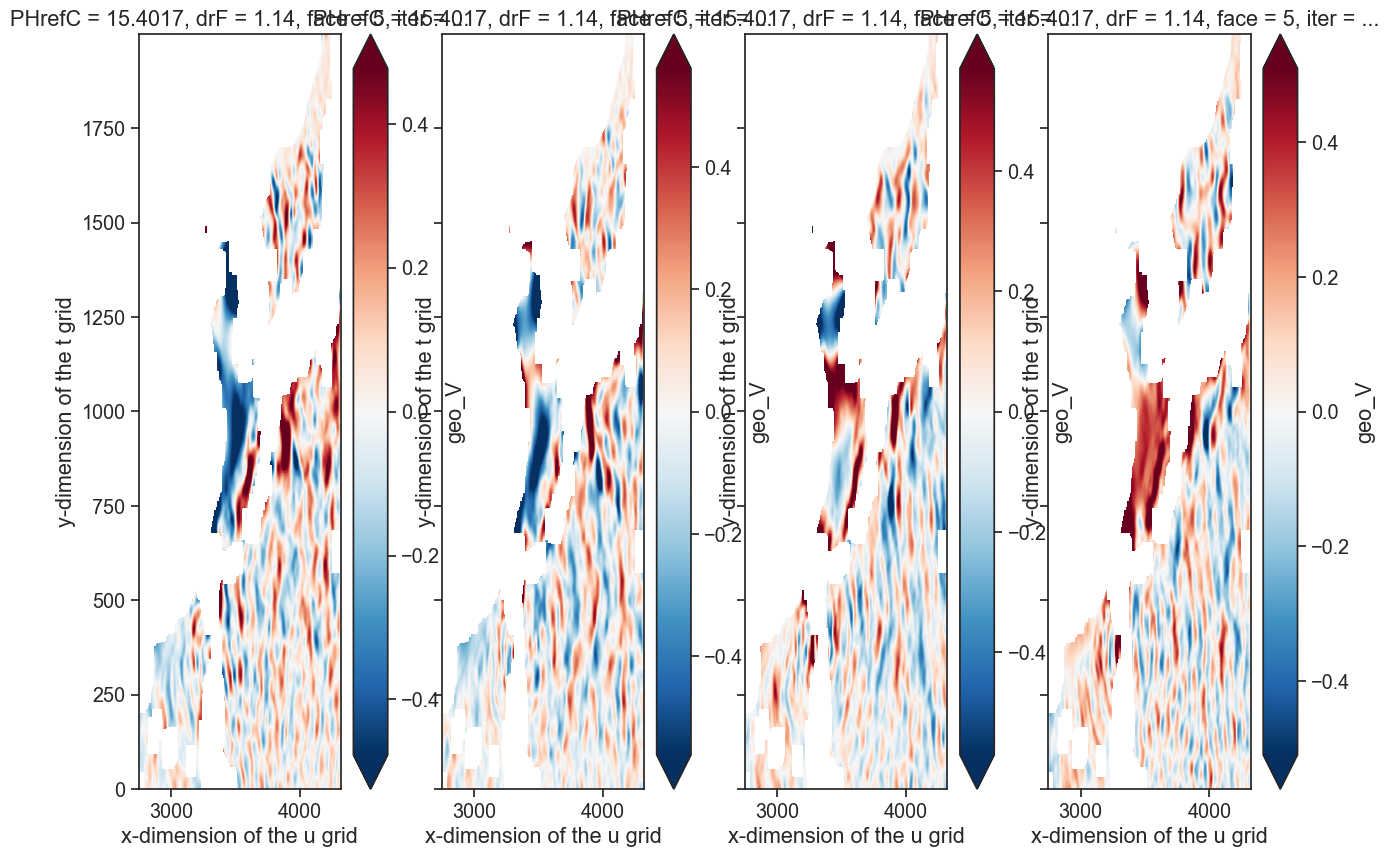

In [32]:
fig, ax = plt.subplots(1,4, figsize = (15,10), sharey = True)
ds_15.geo_V.plot(robust = True, ax = ax[0])
ds_20.geo_V.plot(robust = True, ax = ax[1])
ds_25.geo_V.plot(robust = True, ax = ax[2])
ds_30.geo_V.plot(robust = True, ax = ax[3])

In [33]:
#(ds_1.geo_U**2 + ds_1.geo_V**2).plot(robust = True)

In [34]:
ds_1

<xarray.Dataset>
Dimensions:    (i: 1570, i_g: 1570, j: 2000, j_g: 2000)
Coordinates: (12/28)
    CS         (j, i) float32 ...
    Depth      (j, i) float32 ...
    PHrefC     float32 ...
    SN         (j, i) float32 ...
    XC         (j, i) float32 ...
    XG         (j_g, i_g) float32 ...
    ...         ...
    k_u        int64 ...
    rA         (j, i) float32 ...
    rAs        (j_g, i) float32 ...
    rAw        (j, i_g) float32 ...
    rAz        (j_g, i_g) float32 ...
    time       datetime64[ns] 2011-09-25T12:00:00
Data variables: (12/14)
    SSH        (j, i) float32 ...
    SST        (j, i) float32 ...
    SSS        (j, i) float32 ...
    U          (j, i_g) float32 ...
    V          (j_g, i) float32 ...
    zeta       (j_g, i_g) float32 ...
    ...         ...
    eta_filt   (j, i) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    eta_dx     (j, i_g) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    eta_dy     (j_g, i) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    f          (j) float32 3.466e-05 3.47e-05 3.475e-05 ... 0.0001054 0.0001054
    geo_V      (j, i_g) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    geo_U      (j_g, i) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:  CF-1.6
    history:      Created by calling `open_mdsdataset(llc_method='smallchunks...
    source:       MITgcm
    title:        netCDF wrapper of MITgcm MDS binary data